In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
df=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [35]:
df[df['TotalCharges'] == ' ']
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"],errors='coerce')
df.dropna(inplace= True)
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


#### 字段含义
customerID：用户ID

gender：性别

SeniorCitizen：是否是老人

Partner：是否有伴侣

Dependents：是否有需要抚养的孩子

tenure：任职

PhoneService：是否办理电话服务

MultipleLines：是否开通了多条线路

InternetService：是否开通网络服务和开通的服务类型（光纤、电话拨号）

TechSupport：是否办理技术支持服务

OnlineBackup：是否办理在线备份服务

OnlineSecurity：是否办理在线安全服务

DeviceProtection：是否办理设备保护服务

StreamingTV：是否办理电视服务

StreamingMovies：是否办理电影服务

Contract：签订合约的时长

PaperlessBilling：是否申请了无纸化账单

PaymentMethod：付款方式（电子支票、邮寄支票、银行自动转账、信用卡自动转账）

MonthlyCharges：月消费

TotalCharges：总消费

Churn：用户是否流失

In [37]:
df.drop(["customerID"], axis= 1,inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df_new=pd.get_dummies(df, drop_first= True)
df_new.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


In [13]:
df_new.corr().sort_values(by="Churn_Yes")

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
tenure,0.015683,1.000000,0.246862,0.825880,0.005285,0.381912,0.163386,0.007877,-0.007877,0.332399,...,0.280264,-0.037529,0.285402,0.202338,0.563801,0.004823,0.232800,-0.210197,-0.232181,-0.354049
Contract_Two year,-0.116205,0.563801,-0.073256,0.358036,-0.003603,0.247334,0.201699,0.004442,-0.004442,0.106618,...,0.072124,0.217542,0.075603,-0.288843,1.000000,-0.146281,0.174410,-0.281147,-0.007423,-0.301552
OnlineSecurity_No internet service,-0.182519,-0.037529,-0.763191,-0.374878,0.004745,-0.000286,0.138383,0.171817,-0.171817,-0.210794,...,-0.414951,1.000000,-0.418450,0.038061,0.217542,-0.320592,0.001870,-0.284608,0.319694,-0.227578
StreamingMovies_No internet service,-0.182519,-0.037529,-0.763191,-0.374878,0.004745,-0.000286,0.138383,0.171817,-0.171817,-0.210794,...,-0.414951,1.000000,-0.418450,0.038061,0.217542,-0.320592,0.001870,-0.284608,0.319694,-0.227578
StreamingTV_No internet service,-0.182519,-0.037529,-0.763191,-0.374878,0.004745,-0.000286,0.138383,0.171817,-0.171817,-0.210794,...,-0.414951,1.000000,-0.418450,0.038061,0.217542,-0.320592,0.001870,-0.284608,0.319694,-0.227578
TechSupport_No internet service,-0.182519,-0.037529,-0.763191,-0.374878,0.004745,-0.000286,0.138383,0.171817,-0.171817,-0.210794,...,-0.414951,1.000000,-0.418450,0.038061,0.217542,-0.320592,0.001870,-0.284608,0.319694,-0.227578
DeviceProtection_No internet service,-0.182519,-0.037529,-0.763191,-0.374878,0.004745,-0.000286,0.138383,0.171817,-0.171817,-0.210794,...,-0.414951,1.000000,-0.418450,0.038061,0.217542,-0.320592,0.001870,-0.284608,0.319694,-0.227578
OnlineBackup_No internet service,-0.182519,-0.037529,-0.763191,-0.374878,0.004745,-0.000286,0.138383,0.171817,-0.171817,-0.210794,...,-0.414951,1.000000,-0.418450,0.038061,0.217542,-0.320592,0.001870,-0.284608,0.319694,-0.227578
InternetService_No,-0.182519,-0.037529,-0.763191,-0.374878,0.004745,-0.000286,0.138383,0.171817,-0.171817,-0.210794,...,-0.414951,1.000000,-0.418450,0.038061,0.217542,-0.320592,0.001870,-0.284608,0.319694,-0.227578
TotalCharges,0.102411,0.825880,0.651065,1.000000,0.000048,0.319072,0.064653,0.113008,-0.113008,0.469042,...,0.515709,-0.374878,0.519867,0.170569,0.358036,0.157830,0.182663,-0.060436,-0.294708,-0.199484


In [20]:
df_new[["tenure","Churn_Yes"]].head()

,tenure,Churn_Yes
0,1,0
1,34,0
2,2,1
3,45,0
4,2,1


<AxesSubplot:xlabel='TotalCharges', ylabel='Count'>

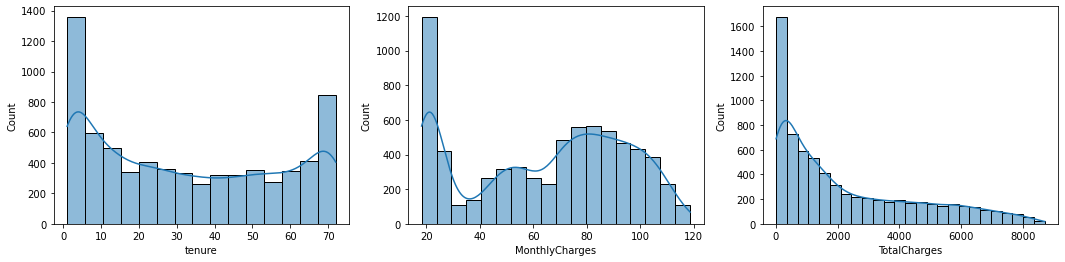

In [21]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))

sns.histplot(data=df,x='tenure',kde=True, ax=ax1)
sns.histplot(data=df,x='MonthlyCharges',kde=True, ax=ax2)
sns.histplot(data=df,x='TotalCharges',kde=True, ax=ax3)

In [23]:
df_customer= df.groupby("gender").size().sort_values(ascending=False)
df_customer

gender
Male      3549
Female    3483
dtype: int64

In [24]:
from pyecharts import options as opts
from pyecharts.charts import Pie

In [25]:
def create_pie(datas, title) -> Pie:
    pie = Pie()
    pie.add("", datas)
    pie.set_global_opts(
        title_opts=opts.TitleOpts(title=title),
        legend_opts=opts.LegendOpts(pos_right="right")
    )
    pie.set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}: {d}%"))
    return pie

In [26]:
datas = list(zip(df_customer.index.to_list(), df_customer.to_list()))
datas
pie = create_pie(datas, "客户性别比例分布")
pie.render_notebook()

In [27]:
df_Churn= df.groupby("Churn").size().sort_values(ascending=False)
datas = list(zip(df_Churn.index.to_list(), df_Churn.to_list()))
pie = create_pie(datas, "客户流失比例分布")
pie.render_notebook()

In [38]:
df.set_index("Churn",inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
Churn,,,,,,,,,,,,,,,,,,,
No,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
No,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
Yes,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
No,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
Yes,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [44]:
df_Churn_yes=df.loc["Yes",:]
df_Churn_no=df.loc["No",:]

In [48]:
df_yes= df_Churn_yes.groupby("Contract").size().sort_values(ascending=False)
df_no= df_Churn_no.groupby("Contract").size().sort_values(ascending=False)
datas1 = list(zip(df_yes.index.to_list(), df_yes.to_list()))
datas2 = list(zip(df_no.index.to_list(), df_no.to_list()))
pie1 = create_pie(datas1, "流失客户的签约时长")
pie2 = create_pie(datas2, "现存客户的签约时长")
pie1.render_notebook()

In [49]:
pie2.render_notebook()

In [51]:
df_yes= df_Churn_yes.groupby("PaymentMethod").size().sort_values(ascending=False)
df_no= df_Churn_no.groupby("PaymentMethod").size().sort_values(ascending=False)
datas1 = list(zip(df_yes.index.to_list(), df_yes.to_list()))
datdf_yesas2 = list(zip(df_no.index.to_list(), df_no.to_list()))
pie1 = create_pie(datas1, "流失客户的付款方式（电子支票、邮寄支票、银行自动转账、信用卡自动转账）")
pie2 = create_pie(datas2, "现存客户的付款方式（电子支票、邮寄支票、银行自动转账、信用卡自动转账）")
pie1.render_notebook()

In [52]:
pie2.render_notebook()

In [56]:
df_Churn_yes.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
Churn,,,,,,,,,,,,,,,,,,,
Yes,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
Yes,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
Yes,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50
Yes,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05
Yes,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30


In [57]:
df_Churn_no.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
Churn,,,,,,,,,,,,,,,,,,,
No,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
No,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
No,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
No,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40
No,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90


In [58]:
df_Churn_yes.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,1869.000000,1869.000000,1869.000000,1869.000000
mean,0.254682,17.979133,74.441332,1531.796094
std,0.435799,19.531123,24.666053,1890.822994
min,0.000000,1.000000,18.850000,18.850000
25%,0.000000,2.000000,56.150000,134.500000
50%,0.000000,10.000000,79.650000,703.550000
75%,1.000000,29.000000,94.200000,2331.300000
max,1.000000,72.000000,118.350000,8684.800000


In [59]:
df_Churn_no.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5163.000000,5163.00000,5163.000000,5163.000000
mean,0.128995,37.65001,61.307408,2555.344141
std,0.335227,24.07694,31.094557,2329.456984
min,0.000000,1.00000,18.250000,18.800000
25%,0.000000,15.00000,25.100000,577.825000
50%,0.000000,38.00000,64.450000,1683.600000
75%,0.000000,61.00000,88.475000,4264.125000
max,1.000000,72.00000,118.750000,8672.450000


In [60]:
df_Churn_yes.select_dtypes(include='object').describe()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
count,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,Female,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,939,1200,1543,1699,850,1297,1461,1233,1211,1446,942,938,1655,1400,1071


In [61]:
df_Churn_no.select_dtypes(include='object').describe()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
count,5163,5163,5163,5163,5163,5163,5163,5163,5163,5163,5163,5163,5163,5163,5163
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,Male,Yes,No,Yes,No,DSL,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Mailed check
freq,2619,2724,3390,4653,2536,1957,2036,1902,1883,2026,1889,1913,2220,2768,1296
